## main Library

In [1]:

# Reading Data & Visulization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Building Model 
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [2]:
# Reading files -
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ID = test["Id"]

train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
## Cleaning Data -
def clean_data(data):
    data = data.drop(["MiscFeature", "Fence", "PoolQC", "Alley", "Id", "FireplaceQu", "MasVnrType"], axis=1)
    
    return data
    
train = clean_data(train)
test = clean_data(test)

In [6]:
## Fillna Data ==> mean
def fillna_data(data):
    data_not_object = data.select_dtypes(exclude=["object"])
    
    data_object = data.select_dtypes(include=["object"])
    
    for col in data_not_object:
        data[col].fillna(data[col].median(), inplace=True)
        
    for col in data_object:
        data[col].fillna(data[col].value_counts().index[0], inplace=True)
        
        
    return data
trian = fillna_data(train)
test = fillna_data(test)

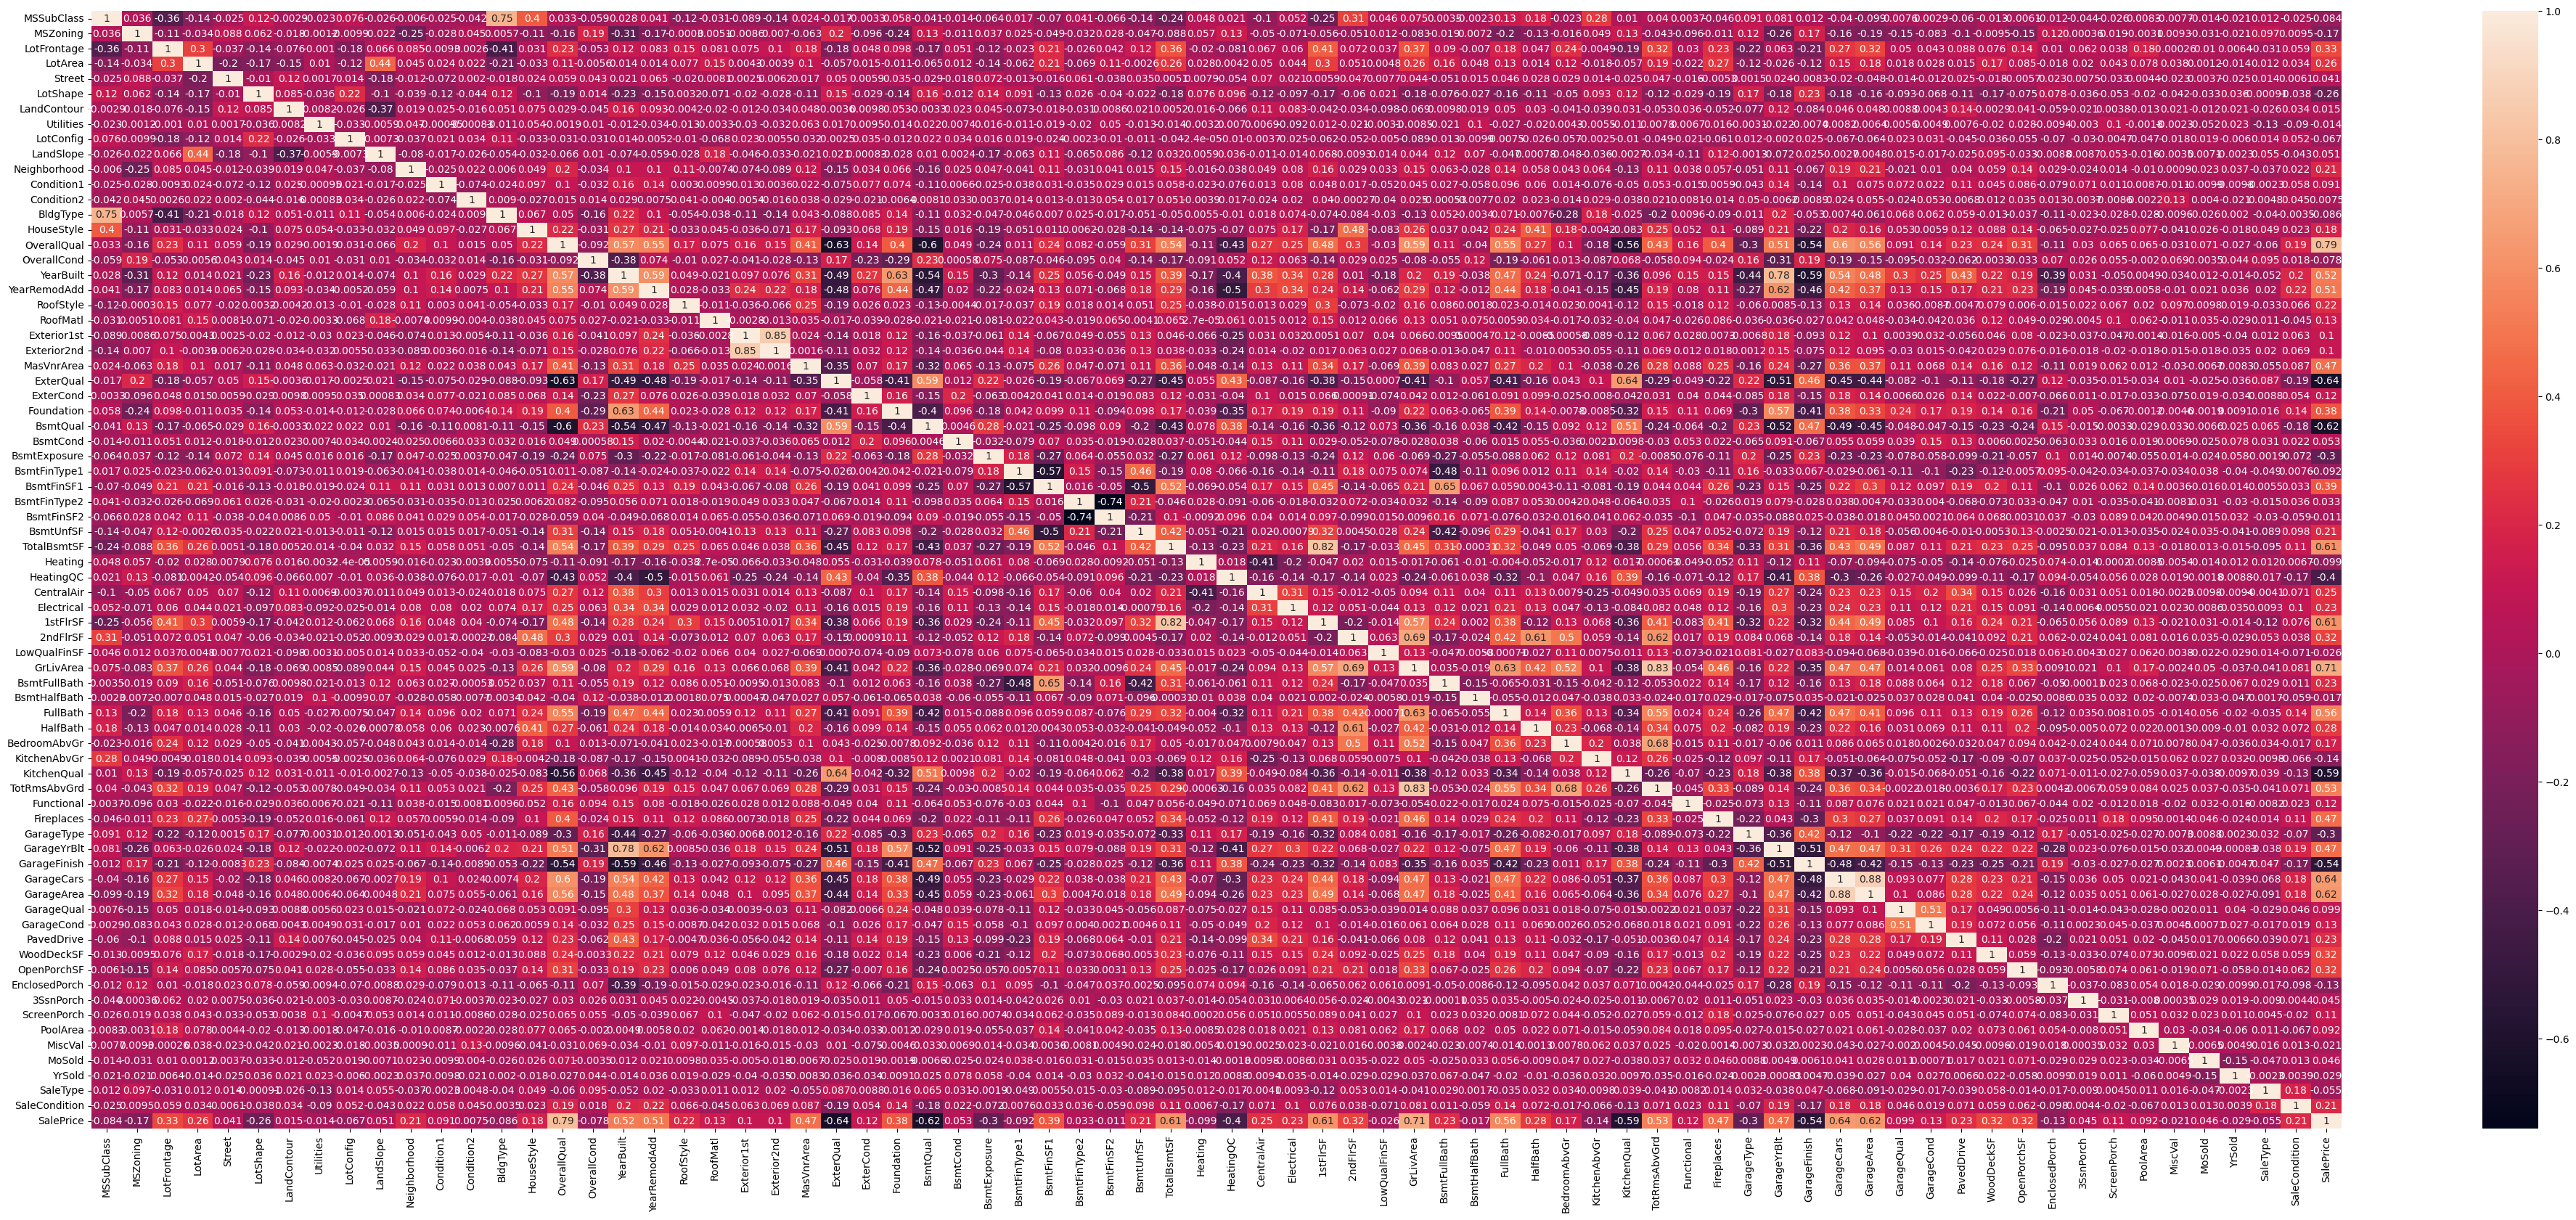

In [13]:
plt.figure(figsize=(50,20))
sns.heatmap(train.corr(), annot=True);

# The OverallCond is Most Important:
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

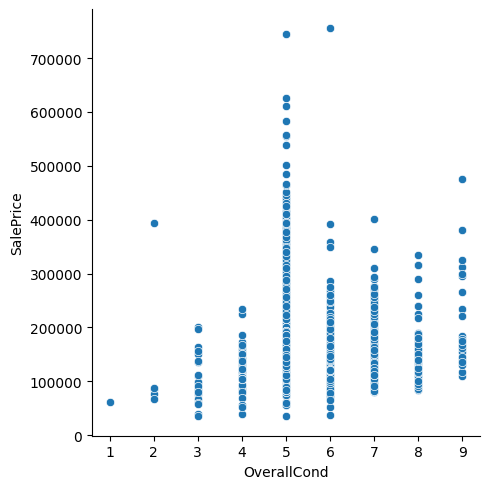

In [14]:
sns.relplot(x="OverallCond", y="SalePrice", data=train);

## Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total ro

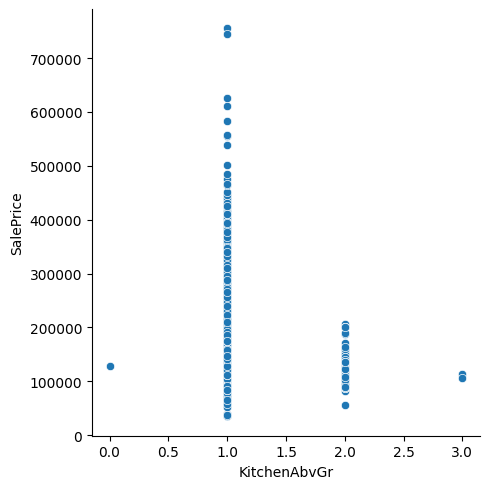

In [15]:
sns.relplot(x="KitchenAbvGr", y="SalePrice", data=train);

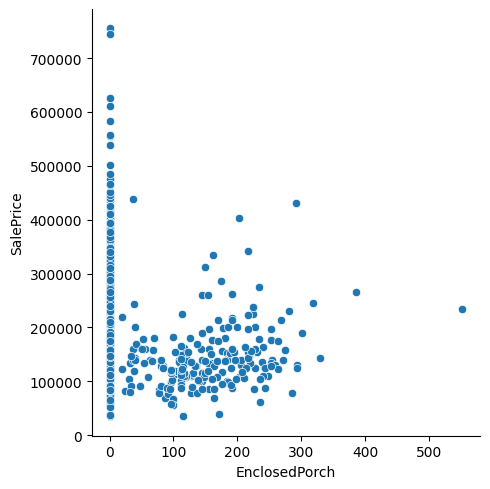

In [16]:
sns.relplot(x="EnclosedPorch", y="SalePrice", data=train);

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Label Enconder:

In [12]:
object_element = train.select_dtypes(include=["object"])

La = LabelEncoder()

for col in object_element.columns:
    train[col] = La.fit_transform(train[col])
    test[col] = La.transform(test[col])
    
train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
5,50,3,85.0,14115,1,0,3,0,4,0,...,0,320,0,0,700,10,2009,8,4,143000
6,20,3,75.0,10084,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,307000
7,60,3,69.0,10382,1,0,3,0,0,0,...,228,0,0,0,350,11,2009,8,4,200000
8,50,4,51.0,6120,1,3,3,0,4,0,...,205,0,0,0,0,4,2008,8,0,129900
9,190,3,50.0,7420,1,3,3,0,0,0,...,0,0,0,0,0,1,2008,8,4,118000


In [28]:
X_input = train.drop(["SalePrice"], axis=1)
Y_output = train["SalePrice"]


# scaler = StandardScaler()
# X_input = scaler.fit_transform(X_input)

In [29]:
# x_train, x_test, y_train, y_test = train_test_split(X_input, Y_output, train_size=0.7, random_state=42)

# # Training Model


# Random Forest

In [30]:
# Random Forest
model_Random = RandomForestRegressor(n_estimators=100, max_depth=3000)

model_Random.fit(X_input, Y_output)

print(model_Random.score(X_input, Y_output))

0.9825128488400557


In [34]:
model_xgb = xgb.XGBRegressor(n_estimators=10000, max_depth=100,
                             learning_rate=0.01)
                             
model_xgb.fit(X_input, Y_output)

print(f"The predict Score Train is ==> {model_xgb.score(X_input, Y_output)}")
print("%----------------------------------------------------------%")

The predict Score Train is ==> 0.9999999999061427
%----------------------------------------------------------%


In [32]:
Adaboost_reg = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3000),
                              n_estimators=500,
                              learning_rate=0.1)


Adaboost_reg.fit(X_input, Y_output)

print(f"The predict Score Train is ==> {Adaboost_reg.score(X_input, Y_output)}")
print("%----------------------------------------------------------%")

The predict Score Train is ==> 0.9999871324164955
%----------------------------------------------------------%


In [33]:
Adaboost_reg1 = AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=3000),
                              n_estimators=10,
                              learning_rate=0.5)


Adaboost_reg1.fit(X_input, Y_output)

print(f"The predict Score Train is ==> {Adaboost_reg1.score(X_input, Y_output)}")
print("%----------------------------------------------------------%")

The predict Score Train is ==> 0.9917741176822643
%----------------------------------------------------------%


In [35]:
submition = model_xgb.predict(test)
new_df = pd.DataFrame({"Id": test_ID,
                       "SalePrice": submition})

In [36]:
new_df

,Id,SalePrice
0,1461,120951.742188
1,1462,152618.718750
2,1463,183585.656250
3,1464,191279.000000
4,1465,190209.656250
...,...,...
1454,2915,81924.085938
1455,2916,83850.843750
1456,2917,157664.156250
1457,2918,116982.445312


In [37]:
new_df.to_csv(r"D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\house-prices-advanced-regression-techniques\house_price_Submit.csv", index=False)